# Let's see how we can use Bayesian inference to determine which of two sets of 10-digit binary strings is human generated, and which is machine generated.

Before we get started, let's go ahead and import the libraries you'll need for the exercise.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

Here are two sets of strings:

In [ ]:
set1 = ['0000101000',
              '1110101110',
              '1010011110',
              '0010000111',
              '0010110101',
              '0011000111',
              '0000010110',
              '0100010000',
              '1110101110',
              '0111010110',
              '1111001000',
              '1100010111',
              '1101001110',
              '0010010100',
              '0001011011',
              '1101010110',
              '1110000101']

set2 = ['1010111011',
              '0101010101',
              '0110101010',
              '1000000000',
              '0101010101',
              '1011110010',
              '0101110110',
              '1011001010',
              '0000000101',
              '0101010101',
              '0101010101',
              '0100110011',
              '0101010101',
              '1001000110',
              '0000000010',
              '0000010101',
              '0101010101']




# One of these sets was generated by humans, & another using `np.random` ...

 We can use much of the same mathematics from the [**Bayesian Alien**](https://colab.research.google.com/drive/1MMKVn3ceeM-FtbfxI43PfFT3Qe5MVDdr?usp=sharing) notebook to tackle this problem. The statistical model we use to describe the data generation process in that notebook is known as the i.e. Bernoulli [distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution)/[process](https://en.wikipedia.org/wiki/Bernoulli_process)), also known more colloquially as a bent coin model.

 Can we use the bent coin model (i.e. Bernoulli [distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution)/[process](https://en.wikipedia.org/wiki/Bernoulli_process)) and the Bayesian form of reasoning to determine which one is which?

**Hint 1.** Note that there's not one correct way to approach this. There are lots. The first thing to think about is what could the probability $p$ from the Bernoulli process map onto in this situation? Each mapping may yield a different (albeit related) approach to tackling this

**Hint 2.** The goal is to arrive at posteriors defined over a set of hypotheses -- i.e. one posterior distribution for each of these two sets of strings. The difference in these posterior belief distributions can then be used to arrive at a conclusion about the sets.

**Hint 3.** The behavior of a human when generating random binary strings is hard to describe/model -- any attempt to do so here would likely be a gross simplification; the behavior of a computer when generating random binary strings can be described/modelled easily. Use this to your advantage.

#**Challenge problem: fiendishly hard**

When using the Bernoulli distribution/process to model binary string generation, we are fitting data to a model with a single-parameter $p$. Having free parameters that we estimate *a posteriori*, i.e. after looking at the data, can often pose two risks: (i) the risk of overfitting & (ii) having a model that describes the data well, but fails to give mechanistic insight into the underlying phenomena. The more free parameters you have, the greater both risks get ...


Can you therefore think of a model for human generation of random binary strings that has no free parameters? If so, write some code to perform Bayesian selection on the model space (consisting of just 2 models, i.e. the model for human-generated strings & the model for computer-generated strings), to arrive at an inference about which string above is human generated & which is computer generated. How does your degree of confidence compare to what you did above, with 1 free parameter?

**Hint:** [This paper](https://arxiv.org/pdf/1106.3059.pdf) might help, along with [this dataset](http://www.complexity-calculator.com/D5.csv) that comes out of this paper (note that the latter link is a download link).

[[0 0 0 1 1 1 1 0 0]
 [0 0 1 1 1 1 0 0 1]
 [1 1 1 0 1 0 0 0 1]
 [0 1 1 0 0 0 1 0 0]
 [0 1 1 1 0 1 1 1 1]
 [0 1 0 1 0 0 1 0 0]
 [0 0 0 0 1 1 1 0 1]
 [1 1 0 0 1 1 0 0 0]
 [0 0 1 1 1 1 0 0 1]
 [1 0 0 1 1 1 1 0 1]
 [0 0 0 1 0 1 1 0 0]
 [0 1 0 0 1 1 1 0 0]
 [0 1 1 1 0 1 0 0 1]
 [0 1 1 0 1 1 1 1 0]
 [0 0 1 1 1 0 1 1 0]
 [0 1 1 1 1 1 1 0 1]
 [0 0 1 0 0 0 1 1 1]]
[0.00000000e+000 4.80141457e-161 2.76632485e-137 1.59969423e-123
 7.42333942e-114 1.95624630e-106 1.95179115e-100 2.02814241e-095
 4.01522933e-091 2.23574565e-087 4.56775907e-084 4.13890347e-081
 1.91308713e-078 5.01618593e-076 8.10270066e-074 8.60760445e-072
 6.33850000e-070 3.37764851e-068 1.34962039e-066 4.16576200e-065
 1.01851799e-063 2.01521433e-062 3.28640030e-061 4.48796870e-060
 5.20345225e-059 5.18409464e-058 4.48521616e-057 3.40149566e-056
 2.27989448e-055 1.36050233e-054 7.27540708e-054 3.50686567e-053
 1.53161247e-052 6.08941801e-052 2.21319998e-051 7.38105740e-051
 2.26640835e-050 6.42684810e-050 1.68764487e-049 4.113831

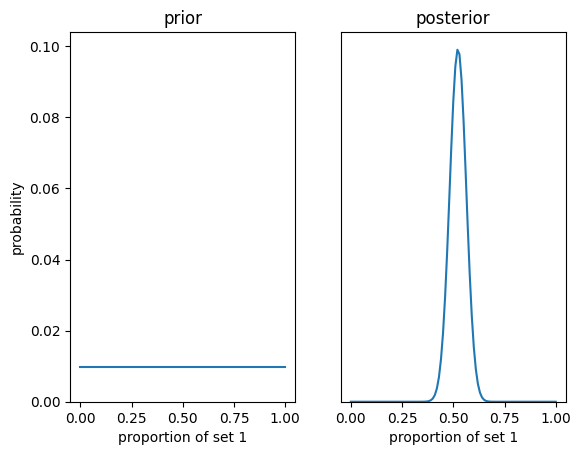

In [ ]:


# Print parity for set 1


data = []
for bit in set1:
  a = [eval(i) for i in bit]
  data.append(np.bitwise_xor(np.array(a)[:-1], np.array(a)[1:]))
  #print(np.bitwise_xor(np.array(a)[:-1], np.array(a)[1:]))

data = np.array(data)
print(data)
hypo = np.linspace(0, 1, 101)

prior = np.full((101), 1/101)

likelihood = (hypo** np.sum(data)) * (1-hypo)**(np.size(data)-np.sum(data))
print(likelihood)

marg_likelihood = np.sum(likelihood*prior)

posterior = (likelihood*prior) / marg_likelihood
print(sum(posterior))
print(np.cumsum(posterior))


fig, ax  = plt.subplots(1,2) # generates a figure with two subplots

ax[0].plot(hypo,prior) # plots prior on first subplot
# sets the ylims so that the minimum is zero (probabilities cannot be negative)
# and the maximum is a tad more than the max of the posterior, so both graphs
# can have the same scale, and all the data will fit the plot area
ax[0].set_ylim([0, 1.05*np.amax(posterior)])
# sets titles and axis labels
ax[0].set_title('prior')
ax[0].set_ylabel('probability')
ax[0].set_xlabel('proportion of set 1')

ax[1].plot(hypo,posterior) #plots posterior on the second subplot
#sets the y lims so that two plots have same y-axis and data stays in the range of the plot area
ax[1].set_ylim([0, 1.05*np.amax(posterior)])
# gets rid of y-axis labels and ticks, because the two graphs share the same y-axis
ax[1].axes.yaxis.set_visible(False)
# sets titles and x-axis label
ax[1].set_title('posterior')
ax[1].set_xlabel('proportion of set 1');


#np.array(a)[:-1]

[[1 1 1 1 0 0 1 1 0]
 [1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 1 0 1 1]
 [1 1 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 1 1 1]
 [0 0 0 0 0 0 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 0 1 0 1 0 1 0]
 [1 1 1 1 1 1 1 1 1]
 [1 0 1 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 1 1]
 [0 0 0 0 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]
[0.00000000e+000 6.29823631e-215 6.40632575e-183 2.77634883e-164
 4.02620415e-151 5.82205505e-141 1.06185461e-132 9.45596628e-126
 9.22292477e-120 1.65902357e-114 7.85516721e-110 1.26170440e-105
 8.29079632e-102 2.56935621e-098 4.19400144e-095 3.93582067e-092
 2.27869030e-089 8.62237360e-087 2.23663572e-084 4.13948364e-082
 5.65391061e-080 5.86557694e-078 4.73782016e-076 3.04405021e-074
 1.58499577e-072 6.79827994e-071 2.43672961e-069 7.39221059e-068
 1.91957104e-066 4.30992603e-065 8.44275323e-064 1.45465302e-062
 2.22053521e-061 3.02296063e-060 3.69202947e-059 4.06719646e-058
 4.06112526e-057 3.69189848e-056 3.06805086e-055 2.339296

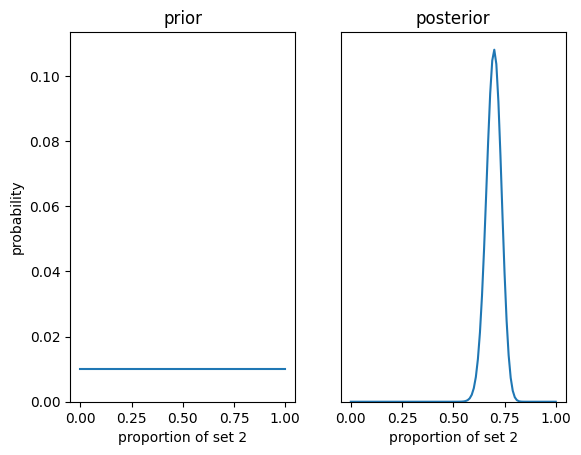

In [ ]:
data_2 = []
for bit in set2:
  a = [eval(i) for i in bit]
  data_2.append(np.bitwise_xor(np.array(a)[:-1], np.array(a)[1:]))
  #print(np.bitwise_xor(np.array(a)[:-1], np.array(a)[1:]))

data_2 = np.array(data_2)
print(data_2)
hypo_2 = np.linspace(0, 1, 101)

prior_2 = np.full((101), 1/101)

likelihood_2 = (hypo_2** np.sum(data_2)) * (1-hypo_2)**(np.size(data_2)-np.sum(data_2))
print(likelihood_2)

marg_likelihood_2 = np.sum(likelihood_2*prior_2)

posterior_2 = (likelihood_2*prior_2) / marg_likelihood_2
print(sum(posterior_2))
print(np.cumsum(posterior_2))


fig, ax  = plt.subplots(1,2) # generates a figure with two subplots

ax[0].plot(hypo_2,prior_2) # plots prior on first subplot
# sets the ylims so that the minimum is zero (probabilities cannot be negative)
# and the maximum is a tad more than the max of the posterior, so both graphs
# can have the same scale, and all the data will fit the plot area
ax[0].set_ylim([0, 1.05*np.amax(posterior_2)])
# sets titles and axis labels
ax[0].set_title('prior')
ax[0].set_ylabel('probability')
ax[0].set_xlabel('proportion of set 2')

ax[1].plot(hypo_2,posterior_2) #plots posterior on the second subplot
#sets the y lims so that two plots have same y-axis and data stays in the range of the plot area
ax[1].set_ylim([0, 1.05*np.amax(posterior_2)])
# gets rid of y-axis labels and ticks, because the two graphs share the same y-axis
ax[1].axes.yaxis.set_visible(False)
# sets titles and x-axis label
ax[1].set_title('posterior')
ax[1].set_xlabel('proportion of set 2');


In [ ]:
mode = hypo[np.argmax(posterior)]
print(mode)
median = np.interp(0.5, np.cumsum(posterior), hypo)
print(median)
mean = np.sum(hypo*posterior)
print(mean)

0.52
0.5176676419830312
0.5225806451612903
